Epoch 1/10 - Train Loss: 0.4313 - Val Loss: 0.2811 - Val Accuracy: 91.66%
Epoch 2/10 - Train Loss: 0.2328 - Val Loss: 0.2026 - Val Accuracy: 93.97%
Epoch 3/10 - Train Loss: 0.1733 - Val Loss: 0.1712 - Val Accuracy: 94.88%
Epoch 4/10 - Train Loss: 0.1400 - Val Loss: 0.1503 - Val Accuracy: 95.56%
Epoch 5/10 - Train Loss: 0.1180 - Val Loss: 0.1387 - Val Accuracy: 95.92%
Epoch 6/10 - Train Loss: 0.1033 - Val Loss: 0.1300 - Val Accuracy: 96.38%
Epoch 7/10 - Train Loss: 0.0919 - Val Loss: 0.1329 - Val Accuracy: 96.22%
Epoch 8/10 - Train Loss: 0.0833 - Val Loss: 0.1306 - Val Accuracy: 96.12%
Epoch 9/10 - Train Loss: 0.0751 - Val Loss: 0.1304 - Val Accuracy: 96.27%
Epoch 10/10 - Train Loss: 0.0685 - Val Loss: 0.1194 - Val Accuracy: 96.53%


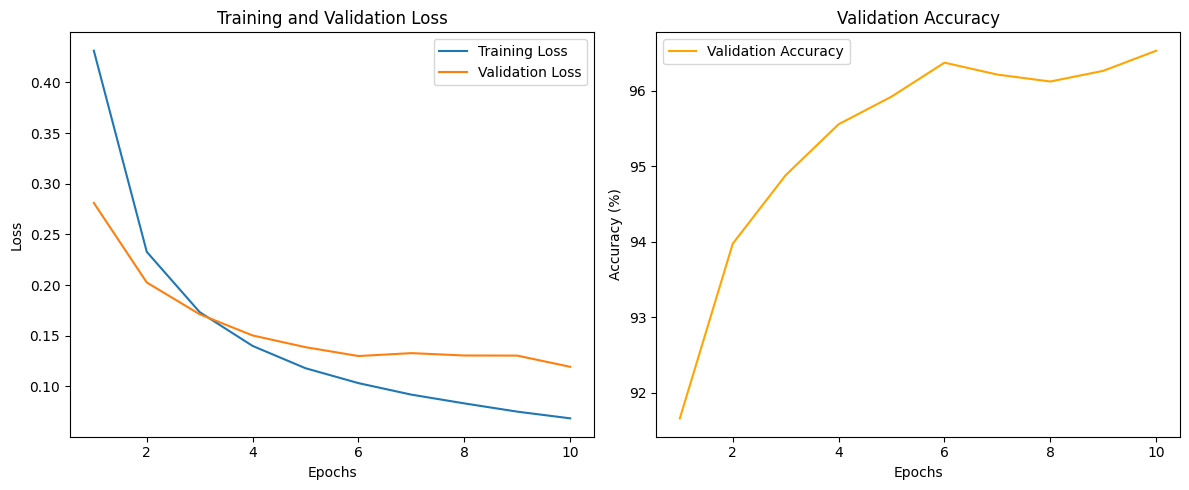

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Ustawienie urządzenia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parametry
batch_size = 64
validation_split = 0.2
n_epochs = 10

# Transformacja danych
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Podział na zbiór treningowy i walidacyjny
train_size = int((1 - validation_split) * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Ładowanie danych
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Definicja modelu
class NeuralNetModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super().__init__()
        self.activation = nn.ReLU()
        self.input_size = input_size
        self.layer1 = nn.Linear(input_size, hidden_layer_size)
        self.layer2 = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        y = self.layer1(x)
        y = self.activation(y)
        y = self.layer2(y)
        return y

input_size = 28 * 28
hidden_layer_size = 100
output_size = 10  # Liczba klas
model = NeuralNetModel(input_size, hidden_layer_size, output_size).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Listy do śledzenia strat i dokładności
train_losses, val_losses = [], []
val_accuracies = []

# Pętla treningowa
for epoch in range(1, n_epochs + 1):
    # Trening
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.reshape(-1, 28 * 28)

        optimizer.zero_grad()
        prediction = model(images)
        loss = loss_function(prediction, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Walidacja
    model.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.reshape(-1, 28 * 28)

            outputs = model(images)
            loss = loss_function(outputs, labels)
            val_loss += loss.item() * images.size(0)

            # Obliczanie dokładności
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)
    accuracy = 100. * correct / len(val_loader.dataset)
    val_accuracies.append(accuracy)

    print(f"Epoch {epoch}/{n_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {accuracy:.2f}%")

# Wykres strat treningowych i walidacyjnych
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, n_epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, n_epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1, 2, 2)
plt.plot(range(1, n_epochs + 1), val_accuracies, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Validation Accuracy")

plt.tight_layout()
plt.show()
